# ROC and Precision/Recall Curves for Red and White Wines

In [1]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors   import KNeighborsClassifier
from sklearn.ensemble  import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score,roc_curve,RocCurveDisplay
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
red = pd.read_csv('C:\projects\Wine_Capstone\winequality-red.csv', sep = ';')
white = pd.read_csv('C:\projects\Wine_Capstone\winequality-white.csv', sep = ';')
fig = plt.figure()
fig.patch.set_facecolor('black')

<Figure size 432x288 with 0 Axes>

In [2]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#Create new column for high quality/ low quality -red
quality_level = []
for row in red['quality']:
    if row >= 6: quality_level.append('high')
    else: quality_level.append('low')
red['quality_level'] = quality_level
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_level
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low


In [4]:
#Define X and y - red
y = red.quality_level == 'high'
X = red.drop(['quality_level','quality'],axis=1)
print(y.shape)
print(X.shape)

(1599,)
(1599, 11)


In [5]:
#Scale the data - red
X_scaled = StandardScaler()
X_scaled = X_scaled.fit_transform(X)
X_scaled.shape

(1599, 11)

# ROC Curves -  Red Wines

The auc score is 0.8534


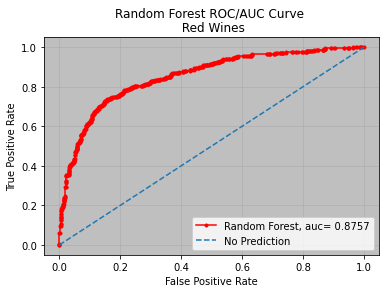

In [24]:
#Random Forest ROC curve - red
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 23)
r_rf = RandomForestClassifier(n_estimators=300,max_depth=6,min_samples_leaf=4,min_samples_split=5,bootstrap=True)
r_rf.fit(X_train,y_train)
y_pred = r_rf.predict_proba(X_test)
y_pred=y_pred[:,1]
rf_auc = roc_auc_score(y_test,y_pred)
rf_auc=round(rf_auc,4)
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

print(f"The auc score is {rf_auc}")
ax=plt.axes()
ax.set_facecolor(color = '0.75')
plt.plot(fpr, tpr, marker='.', color = 'r',label='Random Forest, auc= 0.8757')
plt.plot([0,1], [0,1], linestyle='--', label='No Prediction')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Random Forest ROC/AUC Curve \n Red Wines")
plt.legend()
plt.grid()
plt.show()


The auc score is 0.8253


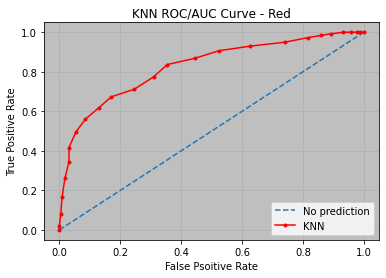

In [7]:
#KNN ROC Curve - red
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state = 23)
r_knn=KNeighborsClassifier(n_neighbors=24)
r_knn.fit(X_train,y_train)
y_pred = r_knn.predict_proba(X_test)
y_pred = y_pred[:,1] 
knn_r_auc = roc_auc_score(y_test,y_pred)
knn_r_auc=round(knn_r_auc,4)
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
ax=plt.axes()
ax.set_facecolor(color = '0.75')
plt.plot([0,1],[0,1], linestyle='--',label='No prediction')
plt.plot(fpr,tpr,marker='.',color='red',label='KNN')
plt.xlabel("False Psoitive Rate")
plt.ylabel("True Positive Rate")
plt.title('KNN ROC/AUC Curve - Red')
plt.legend(loc='lower right')
print(f"The auc score is {knn_r_auc}")
plt.grid()

plt.show()


The auc score is 0.8368


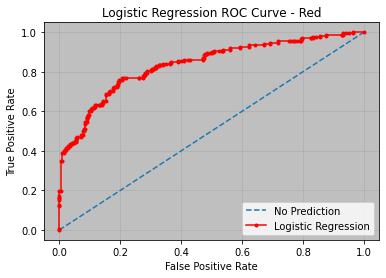

In [8]:
#Logistic Regression ROC Curve - red
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state = 23)
r_lr = LogisticRegression(C=1,max_iter=100)
r_lr.fit(X_train,y_train)
y_pred=r_lr.predict_proba(X_test)
y_pred=y_pred[:,1]
r_lr_auc = roc_auc_score(y_test,y_pred)
r_lr_auc=round(r_lr_auc,4)
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
ax=plt.axes()
ax.set_facecolor(color = '0.75')
plt.plot([0,1],[0,1],linestyle='--',label='No Prediction')
plt.plot(fpr,tpr,marker='.',color = 'red',label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve - Red')
print(f"The auc score is {r_lr_auc}")
plt.legend(loc='lower right')
plt.grid()
plt.show()

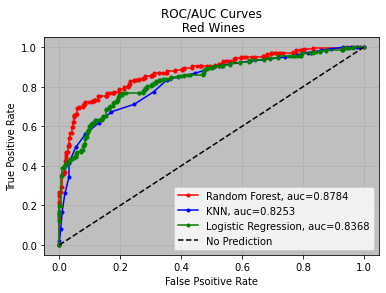

In [9]:
#Plot ROC/AUC for all models
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 23)
r_rf = RandomForestClassifier(n_estimators=300,max_depth=6,min_samples_leaf=4,min_samples_split=5,bootstrap=True)
r_rf.fit(X_train,y_train)
y_pred = r_rf.predict_proba(X_test)
y_pred=y_pred[:,1]
rf_auc = roc_auc_score(y_test,y_pred)
rf_auc=round(rf_auc,4)
ax=plt.axes()
ax.set_facecolor(color = '0.75')
fpr,tpr,thresholds = roc_curve(y_test,y_pred)
plt.plot(fpr, tpr, marker='.', color = 'r',label='Random Forest, auc='+str(rf_auc))

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state = 23)
r_knn=KNeighborsClassifier(n_neighbors=24)
r_knn.fit(X_train,y_train)
y_pred = r_knn.predict_proba(X_test)
y_pred = y_pred[:,1] 
knn_r_auc = roc_auc_score(y_test,y_pred)
knn_r_auc=round(knn_r_auc,4)
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,marker='.',color='blue',label='KNN, auc='+str(knn_r_auc))

r_lr = LogisticRegression(C=1,max_iter=100)
r_lr.fit(X_train,y_train)
y_pred=r_lr.predict_proba(X_test)
y_pred=y_pred[:,1]
r_lr_auc = roc_auc_score(y_test,y_pred)
r_lr_auc=round(r_lr_auc,4)
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,marker='.',color = 'green',label='Logistic Regression, auc='+str(r_lr_auc))
plt.plot([0,1], [0,1], linestyle='--',color='black', label='No Prediction')
plt.xlabel("False Psoitive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC/AUC Curves\n Red Wines')
plt.grid()
plt.legend()

# Precision Recall Curves - Red Wines

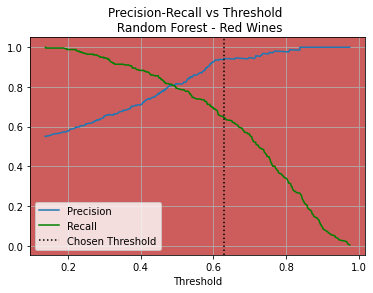

confusion matrix:[[177  46]
 [ 54 203]]
classification matrix:              precision    recall  f1-score   support

       False       0.77      0.79      0.78       223
        True       0.82      0.79      0.80       257

    accuracy                           0.79       480
   macro avg       0.79      0.79      0.79       480
weighted avg       0.79      0.79      0.79       480



In [10]:
#Random Forest Precision Recall Curve

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 23)
r_rf = RandomForestClassifier(n_estimators=300,max_depth=6,min_samples_leaf=4,min_samples_split=5,bootstrap=True)
r_rf.fit(X_train,y_train)
y_pred = r_rf.predict_proba(X_test)
y_pred=y_pred[:,1]
y_predict=r_rf.predict(X_test)
precisions,recalls,thresholds = metrics.precision_recall_curve(y_test,y_pred,)



def plot_precision_recall_vs_thresholds(precisions,recalls,thresholds):
    ax=plt.axes()
    ax.set_facecolor(color = 'indianred')
    plt.plot(thresholds,precisions[:-1],label='Precision')
    plt.plot(thresholds,recalls[:-1],color='green',label='Recall')
    plt.axvline(x =0.63, color = 'black',linestyle=':', label = 'Chosen Threshold')
    plt.xlabel("Threshold")
    plt.title('Precision-Recall vs Threshold \n Random Forest - Red Wines')
    plt.legend(loc='lower left')
    plt.grid()

plot_precision_recall_vs_thresholds(precisions,recalls,thresholds)
plt.show()
print(f'confusion matrix:{metrics.confusion_matrix(y_test,y_predict)}')
print(f'classification matrix:{metrics.classification_report(y_test,y_predict)}')

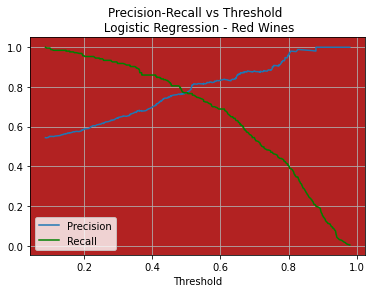

confusion matrix:[[165  58]
 [ 59 198]]
classification matrix:              precision    recall  f1-score   support

       False       0.74      0.74      0.74       223
        True       0.77      0.77      0.77       257

    accuracy                           0.76       480
   macro avg       0.76      0.76      0.76       480
weighted avg       0.76      0.76      0.76       480



In [11]:
#Logistic Regression Precision Recall Curve
y = red.quality_level == 'high'
X = red.drop(['quality_level','quality'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state = 23)
r_lr = LogisticRegression(C=1,max_iter=100)
r_lr.fit(X_train,y_train)
y_pred = r_lr.predict_proba(X_test)
y_pred=y_pred[:,1]
y_predict=r_lr.predict(X_test)
precisions,recalls,thresholds = metrics.precision_recall_curve(y_test,y_pred,)



def plot_precision_recall_vs_thresholds(precisions,recalls,thresholds):
    ax=plt.axes()
    ax.set_facecolor(color = 'indianred')
    plt.plot(thresholds,precisions[:-1],label='Precision')
    plt.plot(thresholds,recalls[:-1],color='green',
             label='Recall')
    plt.xlabel("Threshold")
    plt.title('Precision-Recall vs Threshold \n Logistic Regression - Red Wines')
    plt.legend(loc='lower left')
    plt.grid()

plot_precision_recall_vs_thresholds(precisions,recalls,thresholds)
plt.show()
print(f'confusion matrix:{metrics.confusion_matrix(y_test,y_predict)}')
print(f'classification matrix:{metrics.classification_report(y_test,y_predict)}')

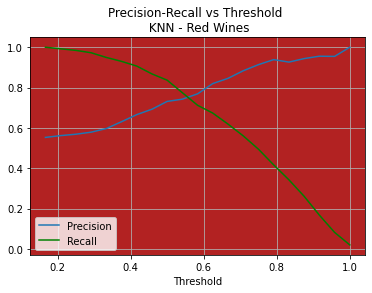

confusion matrix:[[154  69]
 [ 58 199]]
classification matrix:              precision    recall  f1-score   support

       False       0.73      0.69      0.71       223
        True       0.74      0.77      0.76       257

    accuracy                           0.74       480
   macro avg       0.73      0.73      0.73       480
weighted avg       0.74      0.74      0.73       480



In [12]:
#KNN Precision Recall Curve

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state = 23)
r_knn=KNeighborsClassifier(n_neighbors=24)
r_knn.fit(X_train,y_train)
y_pred = r_knn.predict_proba(X_test)
y_pred=y_pred[:,1]
y_predict=r_knn.predict(X_test)
precisions,recalls,thresholds = metrics.precision_recall_curve(y_test,y_pred,)



def plot_precision_recall_vs_thresholds(precisions,recalls,thresholds):
    ax=plt.axes()
    ax.set_facecolor(color = 'indianred')
    plt.plot(thresholds,precisions[:-1],label='Precision')
    plt.plot(thresholds,recalls[:-1],color='green',label='Recall')
    plt.xlabel("Threshold")
    plt.title('Precision-Recall vs Threshold \n KNN - Red Wines')
    plt.legend(loc='lower left')
    plt.grid()

plot_precision_recall_vs_thresholds(precisions,recalls,thresholds)
plt.show()
print(f'confusion matrix:{metrics.confusion_matrix(y_test,y_predict)}')
print(f'classification matrix:{metrics.classification_report(y_test,y_predict)}')

# White ROC Curves

In [14]:
#Create new column for high quality/ low quality -white
quality_level = []
for row in white['quality']:
    if row >= 6: quality_level.append('high')
    else: quality_level.append('low')
white['quality_level'] = quality_level
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_level
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,high
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,high
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,high
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,high
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,high


In [15]:
#Define X and y - white 
y = white.quality_level == 'high'
X = white.drop(['quality_level','quality'], axis=1)
print(y.shape)
print(X.shape)

(4898,)
(4898, 11)


In [16]:
#Scale the data - white
X_scaled = StandardScaler()
X_scaled = X_scaled.fit_transform(X)
X_scaled

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -1.24692128e+00, -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         7.40028640e-01,  1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
         4.75101984e-01, -4.36815783e-01, -3.36667007e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -1.31315295e+00, -2.61552731e-01, -9.05543789e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
         1.00495530e+00, -9.62604939e-01,  1.85757201e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
         4.75101984e-01, -1.48839409e+00,  1.04489089e+00]])

The auc score is 0.8515


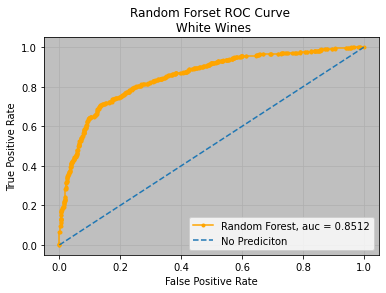

In [25]:
#Random Forest Roc Curve - White
y = white.quality_level == 'high'
X = white.drop(['quality_level','quality'], axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 23)
w_rf = RandomForestClassifier(n_estimators=300,max_depth=6,min_samples_leaf=4,min_samples_split=5,bootstrap=True)
w_rf.fit(X_train,y_train)
y_pred=w_rf.predict_proba(X_test)
y_pred = y_pred[:,1]
w_rf_auc= roc_auc_score(y_test,y_pred)
w_rf_auc = round(w_rf_auc,4)
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

ax=plt.axes()
ax.set_facecolor(color = '0.75')
plt.plot(fpr,tpr,marker='.',color='orange',label='Random Forest, auc = 0.8512')
plt.plot([0,1],[0,1],linestyle = '--',label = 'No Prediciton')
plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")
plt.title("Random Forset ROC Curve \n White Wines")
plt.legend()
print(f"The auc score is {w_rf_auc}")
plt.grid()
plt.show()


The auc score is 0.8149


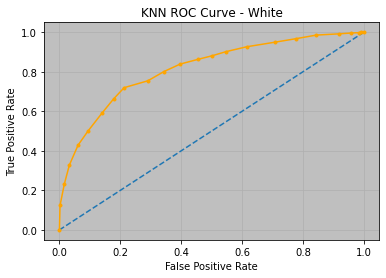

In [18]:
#KNN ROC Curve - White
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state = 23)
w_knn=KNeighborsClassifier(n_neighbors=24)
w_knn.fit(X_train,y_train)
y_pred= w_knn.predict_proba(X_test)
y_pred=y_pred[:,1]
w_knn_auc = roc_auc_score(y_test,y_pred)
w_knn_auc = round(w_knn_auc,4)
fpr,tpr,thresholds = roc_curve(y_test,y_pred)
ax=plt.axes()
ax.set_facecolor(color = '0.75')
plt.plot([0,1],[0,1],linestyle='--',label = "No Prediction")
plt.plot(fpr,tpr,marker='.',color='orange',label='KNN')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN ROC Curve - White")
print(f"The auc score is {w_knn_auc}")
plt.grid()
plt.show()

The auc score is 0.8097


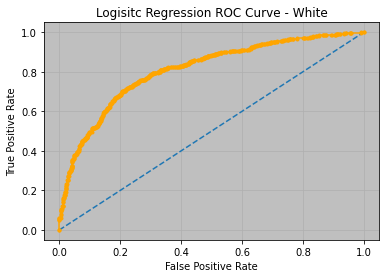

In [19]:
#Logistic Regression ROC Curve - White
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state = 23)
w_lr = LogisticRegression(C=1,max_iter=100)
w_lr.fit(X_train,y_train)
y_pred =w_lr.predict_proba(X_test)
y_pred=y_pred[:,1]
w_lr_auc = roc_auc_score(y_test,y_pred)
w_lr_auc=round(w_lr_auc,4)
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
ax=plt.axes()
ax.set_facecolor(color = '0.75')
plt.plot([0,1],[0,1],linestyle='--',label='No Prediciton')
plt.plot(fpr,tpr,marker='.',color='orange',label='Logistic Regression ROC Curve - White')
plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")
plt.title('Logisitc Regression ROC Curve - White')
plt.grid()
print(f'The auc score is {w_lr_auc}')

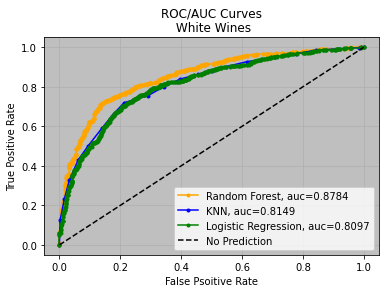

In [20]:
#Plot ROC/AUC Curve for all models
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 23)
w_rf = RandomForestClassifier(n_estimators=300,max_depth=6,min_samples_leaf=4,min_samples_split=5,bootstrap=True)
w_rf.fit(X_train,y_train)
y_pred = w_rf.predict_proba(X_test)
y_pred=y_pred[:,1]
w_rf_auc = roc_auc_score(y_test,y_pred)
w_rf_auc=round(w_rf_auc,4)
fpr,tpr,thresholds = roc_curve(y_test,y_pred)
ax=plt.axes()
ax.set_facecolor(color = '0.75')
plt.plot(fpr, tpr, marker='.', color = 'orange',label='Random Forest, auc='+str(rf_auc))

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state = 23)
w_knn=KNeighborsClassifier(n_neighbors=24)
w_knn.fit(X_train,y_train)
y_pred = w_knn.predict_proba(X_test)
y_pred = y_pred[:,1] 
knn_w_auc = roc_auc_score(y_test,y_pred)
knn_w_auc=round(knn_w_auc,4)
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,marker='.',color='blue',label='KNN, auc='+str(knn_w_auc))

w_lr = LogisticRegression(C=1,max_iter=100)
w_lr.fit(X_train,y_train)
y_pred=w_lr.predict_proba(X_test)
y_pred=y_pred[:,1]
w_lr_auc = roc_auc_score(y_test,y_pred)
w_lr_auc=round(w_lr_auc,4)
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,marker='.',color = 'green',label='Logistic Regression, auc='+str(w_lr_auc))
plt.plot([0,1], [0,1], linestyle='--',color='black', label='No Prediction')
plt.xlabel("False Psoitive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC/AUC Curves\n White Wines')
plt.grid()
plt.legend()

# Precision Recall Curves - White Wines

0.42890780119246036


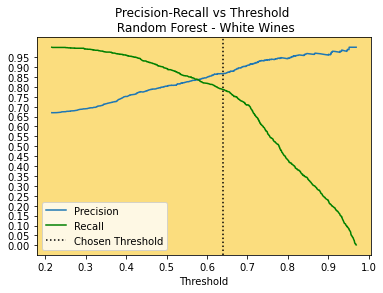

confusion matrix:[[274 215]
 [106 875]]
classification matrix:               precision    recall  f1-score   support

       False       0.72      0.56      0.63       489
        True       0.80      0.89      0.85       981

    accuracy                           0.78      1470
   macro avg       0.76      0.73      0.74      1470
weighted avg       0.78      0.78      0.77      1470



In [21]:
#Random Forest Precision Recall Curve
y = white.quality_level == 'high'
X = white.drop(['quality_level','quality'], axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 23)
w_rf = RandomForestClassifier(n_estimators=300,max_depth=6,min_samples_leaf=4,min_samples_split=5,bootstrap=True)
w_rf.fit(X_train,y_train)
y_pred = w_rf.predict_proba(X_test)
y_pred=y_pred[:,1]
y_predict=w_rf.predict(X_test)
precisions,recalls,thresholds = metrics.precision_recall_curve(y_test,y_pred,)
gmean=np.sqrt(tpr * (1-fpr))
gmean_max = np.argmax(gmean)
print(thresholds[gmean_max])


def plot_precision_recall_vs_thresholds(precisions,recalls,thresholds):
    ax=plt.axes()
    ax.set_facecolor(color = 'xkcd:wheat')
    plt.plot(thresholds,precisions[:-1],label='Precision')
    plt.plot(thresholds,recalls[:-1],color='green',label='Recall')
    plt.axvline(x=0.64,color='black',linestyle=':',label='Chosen Threshold')
    plt.yticks(np.arange(min(y), max(y), 0.05))
    plt.xlabel("Threshold")
    plt.title('Precision-Recall vs Threshold \n Random Forest - White Wines')
    plt.legend(loc='lower left')
  

plot_precision_recall_vs_thresholds(precisions,recalls,thresholds)
plt.show()
print(f'confusion matrix:{metrics.confusion_matrix(y_test,y_predict)}')
print(f'classification matrix: {metrics.classification_report(y_test,y_predict)}')

0.4423367312043524


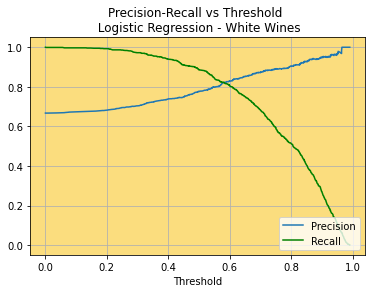

confusion matrix:[[239 250]
 [113 868]]
classification matrix:               precision    recall  f1-score   support

       False       0.68      0.49      0.57       489
        True       0.78      0.88      0.83       981

    accuracy                           0.75      1470
   macro avg       0.73      0.69      0.70      1470
weighted avg       0.74      0.75      0.74      1470



In [22]:
#Logistic Regression Precision Recall Curve

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state = 23)
w_lr = LogisticRegression(C=1,max_iter=100)
w_lr.fit(X_train,y_train)
y_pred = w_lr.predict_proba(X_test)
y_pred=y_pred[:,1]
y_predict=w_lr.predict(X_test)
precisions,recalls,thresholds = metrics.precision_recall_curve(y_test,y_pred,)
gmean=np.sqrt(tpr * (1-fpr))
gmean_max = np.argmax(gmean)
print(thresholds[gmean_max])


def plot_precision_recall_vs_thresholds(precisions,recalls,thresholds):
    ax=plt.axes()
    ax.set_facecolor(color = 'xkcd:wheat')
    plt.plot(thresholds,precisions[:-1],label='Precision')
    plt.plot(thresholds,recalls[:-1],color='green',label='Recall')
    plt.xlabel("Threshold")
    plt.title('Precision-Recall vs Threshold \n Logistic Regression - White Wines')
    plt.legend(loc='lower right')
    plt.grid()

plot_precision_recall_vs_thresholds(precisions,recalls,thresholds)
plt.show()
print(f'confusion matrix:{metrics.confusion_matrix(y_test,y_predict)}')
print(f'classification matrix: {metrics.classification_report(y_test,y_predict)}')

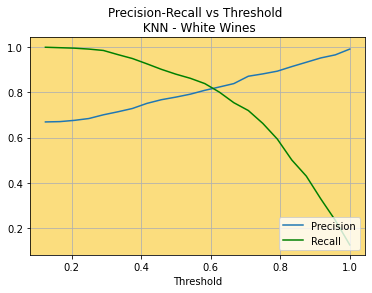

confusion matrix:[[267 222]
 [135 846]]
classification matrix:               precision    recall  f1-score   support

       False       0.66      0.55      0.60       489
        True       0.79      0.86      0.83       981

    accuracy                           0.76      1470
   macro avg       0.73      0.70      0.71      1470
weighted avg       0.75      0.76      0.75      1470



In [23]:
#Logistic Regression Precision Recall Curve
y = white.quality_level == 'high'
X = white.drop(['quality_level','quality'], axis=1)

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state = 23)
w_knn=KNeighborsClassifier(n_neighbors=24)
w_knn.fit(X_train,y_train)
y_pred = w_knn.predict_proba(X_test)
y_pred=y_pred[:,1]
y_predict=w_knn.predict(X_test)
precisions,recalls,thresholds = metrics.precision_recall_curve(y_test,y_pred,)
gmean=np.sqrt(tpr * (1-fpr))
gmean_max = np.argmax(gmean)



def plot_precision_recall_vs_thresholds(precisions,recalls,thresholds):
    ax=plt.axes()
    ax.set_facecolor(color = 'xkcd:wheat')
    plt.plot(thresholds,precisions[:-1],label='Precision')
    plt.plot(thresholds,recalls[:-1],color='green',label='Recall')
    plt.xlabel("Threshold")
    plt.title('Precision-Recall vs Threshold \n KNN - White Wines')
    plt.legend(loc='lower right')
    plt.grid()

plot_precision_recall_vs_thresholds(precisions,recalls,thresholds)
plt.show()
print(f'confusion matrix:{metrics.confusion_matrix(y_test,y_predict)}')
print(f'classification matrix: {metrics.classification_report(y_test,y_predict)}')